### Statistics Intermediate: Averages and Variability

http://www.socialresearchmethods.net/kb/measlevl.htm

In [1]:
from numpy.random import randint, seed

In [2]:
help(randint)

Help on built-in function randint:

randint(...) method of mtrand.RandomState instance
    randint(low, high=None, size=None, dtype='l')
    
    Return random integers from `low` (inclusive) to `high` (exclusive).
    
    Return random integers from the "discrete uniform" distribution of
    the specified dtype in the "half-open" interval [`low`, `high`). If
    `high` is None (the default), then results are from [0, `low`).
    
    Parameters
    ----------
    low : int
        Lowest (signed) integer to be drawn from the distribution (unless
        ``high=None``, in which case this parameter is one above the
        *highest* such integer).
    high : int, optional
        If provided, one above the largest (signed) integer to be drawn
        from the distribution (see above for behavior if ``high=None``).
    size : int or tuple of ints, optional
        Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
        ``m * n * k`` samples are drawn.  Default is None, i

In [2]:
from numpy.random import randint, seed

import numpy as np
equal_distance =0
for i in range(0,5000):
    seed=i
    numbers = randint(0,1000,10)
    mean = numbers.mean()
    #above = lambda:x
    #mult3 = [x for x in [1, 2, 3, 4, 5, 6, 7, 8, 9] if x % 3 == 0]
    above = len([x for x in numbers if x >mean])
    below = len([x for x in numbers if x < mean])
    if above == below:
        equal_distance += equal_distance
print(equal_distance)         # why not giving correct anser

0


In [3]:
from numpy.random import randint, seed
equal_distances = 0

for i in range(5000):
    seed(i)
    distribution = randint(0,1000,10)
    mean = sum(distribution) / len(distribution)
    
    above = []
    below = []
    for value in distribution:
        if value == mean:
            continue # continue with the next iteration because the distance is 0
        if value < mean:
            below.append(mean - value)
        if value > mean:
            above.append(value - mean)
    
    sum_above = round(sum(above),1)
    sum_below = round(sum(below),1)
    if (sum_above == sum_below):
        equal_distances += 1
print(equal_distances)        

5000


In [41]:
from numpy.random import randint, seed
equal_distances = 0

for i in range(5000):
    seed(i)
    distribution = randint(0,1000,10)
    mean = sum(distribution) / len(distribution)
    
    above = []
    below = []
    for value in distribution:
        if value == mean:
            continue # continue with the next iteration because the distance is 0
        if value < mean:
            below.append(mean - value)
        if value > mean:
            above.append(value - mean)
    
    sum_above = round(sum(above),1)
    sum_below = round(sum(below),1)
    if (sum_above == sum_below):
        equal_distances += 1

In [42]:
equal_distances

5000

In [48]:
import pandas as pd


When a statistic is on average equal to the parameter it estimates, we call that statistic an unbiased estimator. In our case, the sample mean is an unbiased estimator for the population mean .

In [4]:
distribution1 = [23, 24, 22, '20 years or lower,', 23, 42, 35]
distribution2 = [55, 38, 123, 40, 71]
distribution3 = [45, 22, 7, '5 books or lower', 32, 65, '100 books or more']

In [5]:
distribution2.sort()

In [6]:
distribution2

[38, 40, 55, 71, 123]

https://ww2.amstat.org/publications/jse/v13n2/vonhippel.html

In [7]:
import pandas as pd
houses = pd.read_table('/home/kamlesh/AnacondaProjects/Dataquest/Data/AmesHousing.txt')

In [8]:
houses.head(5)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [9]:
houses['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
def mean(distribution):
    sum_distribution = 0
    for value in distribution:
        sum_distribution += value
        
    return sum_distribution / len(distribution)

function_mean = mean( houses['SalePrice'])
pandas_mean = houses['SalePrice'].mean()

if function_mean == pandas_mean:
    means_are_equal = True
print(means_are_equal)                    

True




Our aim is to reduce the sampling error. Two important factors that influence the sampling error are:

    Sample representativity — the more representative a sample is, the closer 

will be to

    .
    Sample size — the larger the sample, the more chances we have to get a representative sample. By consequence, this means less sampling error.

This emphasizes once more the importance of the sampling process, where we should try our best to get a representative sample.

In the exercise below, we'll try to visualize on a scatter plot how the sampling error changes as we increase the sample size. Just to prove a point, we'll assume that our data set describes all the houses sold in Ames, Iowa between 2006 and 2010.

Text(0,0.5,'Sampling error')

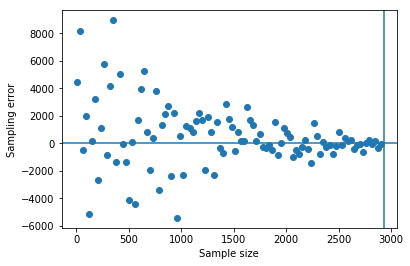

In [13]:
parameter = houses['SalePrice'].mean()
sample_size = 5

sample_sizes = []
sampling_errors = []

for i in range(101):
    sample = houses['SalePrice'].sample(sample_size , random_state = i)
    statistic = sample.mean()
    sampling_error = parameter - statistic
    sampling_errors.append(sampling_error)
    sample_sizes.append(sample_size)
    sample_size += 29
    
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(sample_sizes, sampling_errors)
plt.axhline(0)
plt.axvline(2930)
plt.xlabel('Sample size')
plt.ylabel('Sampling error')

In [6]:
unique_year= list(houses['Yr Sold'].unique())

In [7]:
unique_year

[2010, 2009, 2008, 2007, 2006]

In [8]:
d ={}
def recharge(array,i):
    max_1= array.max()
    min_1 = array.min()
    d[i] = ( max_1 - min_1)
for i in unique_year:
    #find sale price columns for this year
    particular_year_sale=houses[houses['Yr Sold']==i]
    recharge(particular_year_sale['SalePrice'],i)

In [9]:
print(d)

{2008: 601900, 2009: 575100, 2010: 598868, 2006: 590000, 2007: 715700}


In [10]:
def find_range(array):
    return max(array) - min(array)

range_by_year = {}
for year in houses['Yr Sold'].unique():
    data_by_year = houses[houses['Yr Sold'] == year]
    range_by_year[year] = find_range(data_by_year['SalePrice'])

In [11]:
C = [1,1,1,1,1,1,1,1,1,21]
import numpy as np
def find( array):
    mean = np.mean(array)
    average_distance = []
    for i in array:
        distances = i - mean
        average_distance.append( distances)
    return sum(average_distance) / len( average_distance)    
avg_distance = find( C )  

In [12]:
from math import sqrt
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
        
    variance = sum(distances) / len(distances)
    
    return sqrt(variance)

In [13]:
salary_standard_deviation = standard_deviation(houses['SalePrice'])
print( salary_standard_deviation )

79873.05865192247


In [14]:
mean_salary=houses['SalePrice'].mean()
print( mean_salary)

180796.0600682594


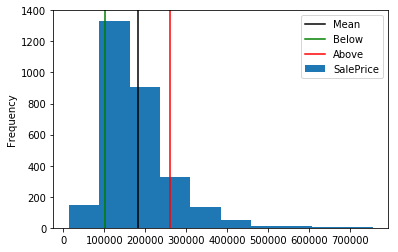

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
houses['SalePrice'].plot.hist()
plt.axvline(x = mean_salary,c = 'Black',label = 'Mean')
plt.axvline(x = mean_salary- salary_standard_deviation,c = 'Green',label = 'Below')
plt.axvline(x = mean_salary + salary_standard_deviation,c = 'Red',label = 'Above')
plt.legend()


In [16]:
#Before computing the standard deviations, you'll first need to segment your data set by year
sd = standard_deviation( houses['SalePrice'])
value = abs( houses['SalePrice'] - sd).max()


In [17]:
years = {}

for year in houses['Yr Sold'].unique():
    year_segment = houses[houses['Yr Sold'] == year]
    st_dev = standard_deviation(year_segment['SalePrice'])
    years[year] = st_dev

# Get years of max and min variability
greatest_variability = max(years, key = years.get) # outputs directly the year with the maximum variability
lowest_variability = min(years, key = years.get) # outputs directly the year with the minimum variability

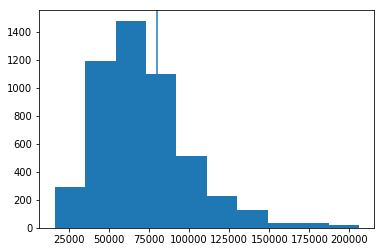

In [18]:
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
    
plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))

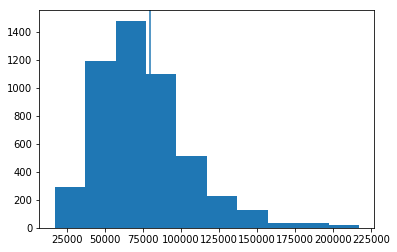

In [19]:

#plt.hist(st_devs)
#plt.axvline(standard_deviation(houses['SalePrice']))
def standard_deviation(array):
    reference_point = sum(array) / len(array)
    
    distances = []
    for value in array:
        squared_distance = (value - reference_point)**2
        distances.append(squared_distance)
    
    variance = sum(distances) / (len(distances) - 1)
    
    return sqrt(variance)

import matplotlib.pyplot as plt
st_devs = []

for i in range(5000):
    sample = houses['SalePrice'].sample(10, random_state = i)
    st_dev = standard_deviation(sample)
    st_devs.append(st_dev)
    
plt.hist(st_devs)
plt.axvline(standard_deviation(houses['SalePrice']))

In [20]:
houses.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [23]:
sample = houses.sample(100, random_state = 1)
from numpy import std, var
pandas_stdev = sample['SalePrice'].std(ddof = 1) # default ddof = 1
numpy_stdev = std(sample['SalePrice'], ddof = 1) # default ddof = 0
equal_stdevs = pandas_stdev == numpy_stdev

pandas_var = sample['SalePrice'].var(ddof = 1) # default ddof = 1
numpy_var = var(sample['SalePrice'], ddof = 1) #default ddof = 0
equal_vars = pandas_var == numpy_var
print(equal_vars)

True


### Z scores

instructions

    Generate a kernel density plot for the SalePrice variable to find out how far off $220,000 is from the mean.
        Generate the plot using Series.plot.kde().
            The limits of the x-axis should be the minimum and the maximum value of the SalePrice variable. To set the limits you can use the xlim parameter of Series.plot.kde().
        Plot a vertical line to indicate visually the location of the mean using plt.axvline().
            The color of the line should be black, and its label should be 'Mean'. You can use the color and label parameters of plt.axvline().
        Plot a vertical line to indicate visually the standard deviation distance above the mean — you'll have to generate a vertical line for the sum of the mean and standard deviation.
            Assume that the data is a population and compute the standard deviation without using Bessel's correction.
            The color of the line should be red and its label should be 'Standard deviation'.
        Plot a vertical line for the $220,000 price.
            The color of the line should be orange and its label should be '220000'.
        Display all the labels using plt.legend().

    Examine the graph and figure out whether a price of $220,000 is very expensive. If it's very expensive, assign True to variable named very_expensive, otherwise assign False.



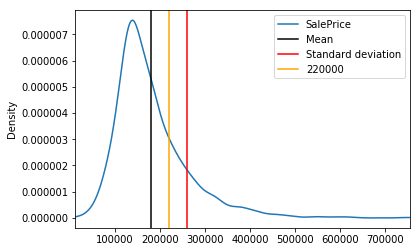

In [62]:
min_1 = houses['SalePrice'].min()
max_1 = houses['SalePrice'].max()
houses['SalePrice'].plot.kde(xlim =[min_1,max_1])

plt.axvline(x =houses['SalePrice'].mean(), c = 'Black', label = 'Mean'  )
plt.axvline(x =houses['SalePrice'].std() + houses['SalePrice'].mean(), c = 'Red', label = 'Standard deviation' )
plt.axvline( x = 220000, c = 'Orange', label = '220000')
plt.legend()

very_expensive = False

### Calcuating Z score
The value representing the number of standard deviations away from the mean is commonly known as the standard score, or the z-score. We'll use the term "z-score" throughout our courses.

In [24]:
#example showing just the calculation of mean values from the data sets
min_val = houses['SalePrice'].min()
mean_val = houses['SalePrice'].mean()
max_val = houses['SalePrice'].max()
def z_score(value, array, bessel = 0):
    mean = sum(array) / len(array)
    
    from numpy import std
    st_dev = std(array, ddof = bessel)
    
    distance = value - mean
    z = distance / st_dev
    
    return z

min_z = z_score(min_val, houses['SalePrice'])
mean_z = z_score(mean_val, houses['SalePrice'])
max_z = z_score(max_val, houses['SalePrice'])

instructions

    Find out the location for which $200,000 has the z-score closest to 0. Code-wise, there are several ways to complete this task, and we encourage you to think of a way yourself. Below we describe one way to complete this task:
        Isolate the data for each of the five neighborhoods. The neigborhoods are described in the Neighborhood column. These are the abbreviations for our neighborhoods of interest:
            'NAmes' for North Ames.
            'CollgCr' for College Creek.
            'OldTown' for Old Town.
            'Edwards' for Edwards.
            'Somerst' for Somerset.
        For example, to isolate the data for North Ames you can do houses[houses['Neighborhood'] == 'NAmes'] and save the data to a variable.
        Find the z-score of a $200,000 price for each of the five data sets you isolated. Assume that each data set is a population.
        Examine the z-scores to find the best location to invest in. Assign your answer as a string to the variable best_investment. Choose between the following strings: 'North Ames', 'College Creek', 'Old Town', 'Edwards', and 'Somerset'.


In [29]:
list1 = ['NAmes','CollgCr','OldTown','Edwards','Somerst']
z_by_location= {}
for l in list1:
    #calculae the mean for the distribution
    print(l)
    sample = houses[houses['Neighborhood']== l ]
    z_value = z_score( 200000, sample['SalePrice'])
    z_by_location[l] = z_value
#years, key = years.get)    
#best_investment = min( z_by_location, key =z_by_location.get )  
print(z_by_location)

NAmes
CollgCr
OldTown
Edwards
Somerst
{'OldTown': 1.7183080926865524, 'Somerst': -0.5186390646965723, 'Edwards': 1.4435761938489418, 'CollgCr': -0.03334366282705464, 'NAmes': 1.7239665910370232}


In [30]:
# Find the location with the z-score closest to 0    
#best_investment = min( z_by_location, key= z_by_location .get)    
best_investment ='College Creek'

### Transformation


A distribution of z-scores is often called a standard distribution (remember that z-scores are also called standard scores). When we convert a distribution to z-scores, we'd say in statistical jargon that we standardized the distribution.

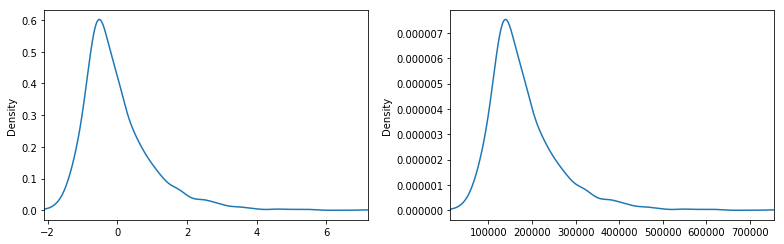

In [33]:
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)

houses['z_prices'] = houses['SalePrice'].apply(
       lambda x: ((x - mean) / st_dev)
       )

plt.figure(figsize = (11,3.5))
plt.subplot(1,2,1)
houses['z_prices'].plot.kde(xlim = (houses['z_prices'].min(),
                                   houses['z_prices'].max()
                                   )
                           )
plt.subplot(1,2,2)
houses['SalePrice'].plot.kde(xlim = (houses['SalePrice'].min(),
                                       houses['SalePrice'].max()
                                       )
                               )
plt.tight_layout() # otherwise the plots will overlay partially

In [42]:
#example
from numpy import std, mean
population = [0,8,0,8]
#use list comprehension
p_mean = mean(population)
p_std = std(population)
population_z = [ ((x - p_mean)/p_std) for x in population ]

mean_z = mean( population_z)
stdev_z = std( population_z)

print( 'mean_z of standard population = ' + str(mean_z) )

print( 'std_z of standard population = ' + str(stdev_z) )

mean_z of standard population = 0.0
std_z of standard population = 1.0


In [51]:
# Notice for this example we have used ddof 1, go back to study it later.
from numpy import std, mean
sample = [0,8,0,8]

x_bar = mean(sample)
s = std(sample, ddof = 1)

standardized_sample = []
for value in sample:
    z = (value - x_bar) / s
    standardized_sample.append(z)
    
stdev_sample = std( standardized_sample,ddof = 1)
print(stdev_sample)

1.0


In [34]:
# Creating transformation for Sale price attribute
mean = houses['SalePrice'].mean()
st_dev = houses['SalePrice'].std(ddof = 0)
#next line creates Z transform
houses['z_prices'] = houses['SalePrice'].apply(lambda x: ((x - mean) / st_dev))
                                                     
#creting mean and standard  of z transform 
z_mean_price = houses['z_prices'].mean()
z_stdev_price = houses['z_prices'].std(ddof = 0)

# Creating transformation for Lot area attribute
area_mean = houses['Lot Area'].mean()
area_std = houses['Lot Area'].std()
houses['z_mean_area'] = houses['Lot Area'].apply( lambda x: ((x - area_mean)/area_std ) )
z_mean_area = houses['z_mean_area'].mean()
z_stdev_area = houses['z_mean_area'].std()